# Task 3

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse 

G = pd.read_pickle('bigger_graph.pickle')
G

Number of nodes: 2767
Number of edges: 229384
Average degree: 165.79978315865557
Is the graph connected? True
Number of connected components: 1


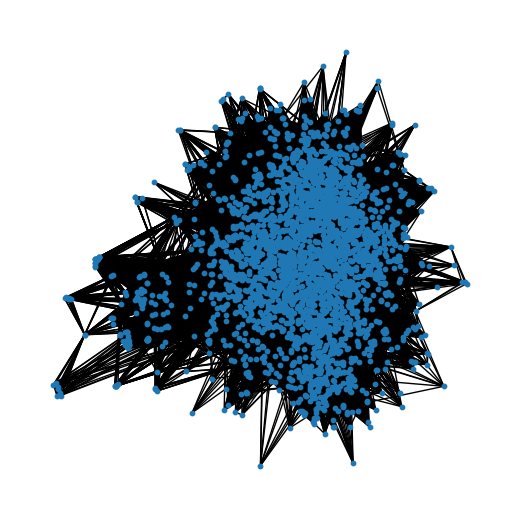

In [2]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
degrees = [G.degree(n) for n in G.nodes()]
print(f"Average degree: {sum(degrees) / len(degrees)}")
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")

plt.figure(figsize=(5, 5)) 
pos = nx.spring_layout(G)
nx.draw(G, pos , with_labels=False, node_size=10)
plt.show()

In [3]:
def recommend_songs_weighted(graph, input_song, num_recommendations=5):
    recommended_songs = []

    if input_song in graph.nodes:
        current_song = input_song
        visited = set([current_song])
        
        while len(recommended_songs) < num_recommendations:
            neighbors = list(graph[current_song])
            neighbor_weights = [(neighbor, graph.edges[current_song, neighbor]['weight']) for neighbor in neighbors if neighbor not in visited]
            
            if not neighbor_weights:
                break
            
            # Sort neighbors by edge weights in descending order
            neighbor_weights.sort(key=lambda x: x[1], reverse=True)
            
            next_song = neighbor_weights[0][0]
            recommended_songs.append((next_song, neighbor_weights[0][1]))
            visited.add(next_song)
            current_song = next_song
        
        return recommended_songs
    else:
        print("Input song not found in the graph.")
        return None


input_song = "spotify:track:62vpWI1CHwFy7tMIcSStl8"  
num_recommendations = 5 
recommended_songs_weighted = recommend_songs_weighted(G, input_song, num_recommendations)
print("Recommended songs:")
for song in recommended_songs_weighted:
    print(song)

Recommended songs:
('spotify:track:16qYlQ6koFxYVbiJbGHblz', 7)
('spotify:track:5lFDtgWsjRJu8fPOAyJIAK', 6)
('spotify:track:27GmP9AWRs744SzKcpJsTZ', 7)
('spotify:track:2FBUoWkIuQXwayw2RNo5l6', 7)
('spotify:track:1xznGGDReH1oQq0xzbwXa3', 8)


## Community/Feature and Evaluation step 

In [4]:
!pip uninstall python-louvain
!pip install python-louvain


^C


In [5]:
!pip show python-louvain


Name: python-louvain
Version: 0.16
Summary: Louvain algorithm for community detection
Home-page: https://github.com/taynaud/python-louvain
Author: Thomas Aynaud
Author-email: taynaud@gmail.com
License: BSD
Location: c:\users\muham\anaconda3\lib\site-packages
Requires: networkx, numpy
Required-by: 


In [7]:
import community as community_louvain

# Apply the Louvain method to find communities
partition = community_louvain.best_partition(G)

# The partition is a dictionary where the keys are the nodes and the values are the community IDs
# You can add this information as node attributes to the graph for easier access
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

unique_communities = set(node[1]['community'] for node in G.nodes(data=True))

# The number of unique communities is the length of the set
num_communities = len(unique_communities)
print(f"There are {num_communities} communities in the graph.")



There are 5 communities in the graph.
